In [ ]:
%pip install matplotlib


In [1]:
import json
import matplotlib.pyplot as plt

def analyze_resume_lengths(json_path):
    resume_lengths = []

    with open(json_path, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                record = json.loads(line.strip())
                resume_str = record.get("Resume_str", "")
                resume_lengths.append(len(resume_str))
            except json.JSONDecodeError:
                continue

    if not resume_lengths:
        print("No resume strings found.")
        return

    max_len = max(resume_lengths)
    avg_len = sum(resume_lengths) / len(resume_lengths)

    print(f"Max Resume_str length: {max_len}")
    print(f"Average Resume_str length: {avg_len:.2f}")

    # Plot length distribution
    plt.figure(figsize=(10, 5))
    plt.hist(resume_lengths, bins=30, color='skyblue', edgecolor='black')
    plt.title("Distribution of Resume_str Lengths")
    plt.xlabel("Length of Resume_str (characters)")
    plt.ylabel("Number of Resumes")
    plt.grid(True)
    plt.show()




Max Resume_str length: 38842
Average Resume_str length: 6295.31


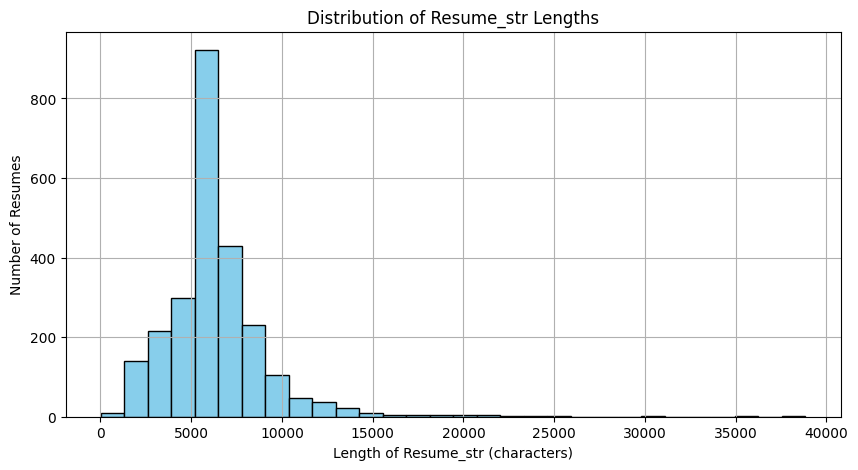

In [2]:
# Example usage
analyze_resume_lengths("json_outputs_all_data/parsed_resumes.json")


In [6]:
import json
import numpy as np

def count_resumes_per_bin(json_path, num_bins=30):
    resume_lengths = []

    with open(json_path, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                record = json.loads(line.strip())
                resume_str = record.get("Resume_str", "")
                resume_lengths.append(len(resume_str))
            except json.JSONDecodeError:
                continue

    # Compute histogram (bin_counts and bin_edges)
    counts, bin_edges = np.histogram(resume_lengths, bins=num_bins)

    # Print bin ranges with counts
    print(f"{'Bin Range (chars)':<30} | {'Count':>6}")
    print("-" * 45)
    for i in range(len(counts)):
        start = int(bin_edges[i])
        end = int(bin_edges[i+1])
        count = counts[i]
        print(f"{start:>5} - {end:<22} | {count:>6}")




In [7]:
count_resumes_per_bin("json_outputs_all_data/parsed_resumes.json", num_bins=30)

Bin Range (chars)              |  Count
---------------------------------------------
   21 - 1315                   |     10
 1315 - 2609                   |    139
 2609 - 3903                   |    214
 3903 - 5197                   |    297
 5197 - 6491                   |    922
 6491 - 7785                   |    429
 7785 - 9079                   |    230
 9079 - 10373                  |    105
10373 - 11667                  |     47
11667 - 12961                  |     36
12961 - 14255                  |     21
14255 - 15549                  |      8
15549 - 16843                  |      5
16843 - 18137                  |      4
18137 - 19431                  |      3
19431 - 20725                  |      4
20725 - 22019                  |      3
22019 - 23313                  |      1
23313 - 24607                  |      1
24607 - 25901                  |      2
25901 - 27195                  |      0
27195 - 28489                  |      0
28489 - 29783                  |  

In [8]:
import json

def count_normal_length_resumes(json_path, min_len=3000, max_len=8000):
    count = 0
    total = 0

    with open(json_path, 'r', encoding='utf-8') as f:
        for line in f:
            try:
                record = json.loads(line.strip())
                resume_str = record.get("Resume_str", "")
                length = len(resume_str)
                total += 1
                if min_len <= length <= max_len:
                    count += 1
            except json.JSONDecodeError:
                continue

    print(f"Total resumes: {total}")
    print(f"Resumes with length between {min_len} and {max_len}: {count}")
    print(f"Percentage: {count / total * 100:.2f}%")

# Example usage
count_normal_length_resumes("json_outputs_all_data/parsed_resumes.json")


Total resumes: 2484
Resumes with length between 3000 and 8000: 1841
Percentage: 74.11%
